<a href="https://colab.research.google.com/github/savioratharv/savioratharv/blob/main/codeicon_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

importing master data

In [ ]:
dataset=pd.read_csv('/content/master recipe data.csv')
dataset

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_14,ingredient_text_15,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.0,Entree~Dinner,NaN,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,Jumbo Burger Cups,Try a biscuit cup filled with burger fixin's ...,12,60 min,NaN,Entree~Dinner,Sandwich & Wrap,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.0,Entree~Dinner,Casserole,Savory,Southwestern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.0,Dessert,Bar~Desserts & Treats,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.0,Appetizer,NaN,Savory~Spicy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.0,Entree~Dinner,Pot Pie~Casserole~Pie,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.isnull().sum()/len(dataset)*100

RecipeId                0.000000
RecipeName              0.000000
Introduction            0.000000
NumberOfIngredients     0.000000
TotalTime               0.000000
Calories                1.985560
Meal_Type               0.000000
Dish_Type              13.176895
Flavor                  5.234657
Cuisine                83.574007
ingredient_text_1       0.000000
ingredient_text_2       0.180505
ingredient_text_3       0.541516
ingredient_text_4       5.415162
ingredient_text_5      13.537906
ingredient_text_6      27.256318
ingredient_text_7      37.725632
ingredient_text_8      57.039711
ingredient_text_9      67.689531
ingredient_text_10     76.714801
ingredient_text_11     84.296029
ingredient_text_12     88.808664
ingredient_text_13     91.516245
ingredient_text_14     94.765343
ingredient_text_15     96.931408
ingredient_text_16     98.194946
ingredient_text_17     99.097473
ingredient_text_18     99.638989
ingredient_text_19     99.819495
ingredient_text_20     99.819495
ingredient

importing review data

In [ ]:
df_review=pd.read_csv('/content/master review data.csv')
df_review

,RecipeId,ReviewText,SubmittedTime
0,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My family it they want me to make it again so...,04/28/2022
1,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,"Was disappointed. Not as ""crispy"" as I though...",03/04/2022
2,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,I am in Canada and have never seen a ranch dr...,03/01/2022
3,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,Everybody loves this dish. So simple to make.d...,11/28/2021
4,d8ab10cd-6bdd-49f7-a169-adafc91a42bc,My family loved this chicken recipe...quick an...,11/20/2021
...,...,...,...
21857,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,Good concept didn't work as hoped. I used a b...,05/31/2012
21858,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,My family loved this! Had no trouble with cook...,05/30/2012
21859,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,I didn't use all the biscuits and it still to...,05/10/2012
21860,3cedf120-1b21-426c-ae1e-6171ff84ddfc-z,Too many rolls - overwhelmed the recipe by bei...,05/03/2012


merging

In [ ]:
df=pd.merge(dataset,df_review,on='RecipeId',how='inner')
df

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,ReviewText,SubmittedTime
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I tried this recipe substituted fresh spinach...,05/19/2022
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great recipe made and the grandkids loved it. ...,04/08/2022
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i put spinach in mine I don;t like Kale in an...,02/01/2022
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I substituted spinach for kale but it was too ...,11/18/2021
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not being a fan of kale I substituted with br...,08/27/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,To rich and salty for my family.,12/23/2017
22915,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I make this for all my get togethers. Everyone...,12/19/2017
22916,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delicious! Received rave reviews. Will definit...,12/04/2017
22917,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.0,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I made this recipe and let me say that everyon...,10/31/2017


In [ ]:
df.isnull().sum()

RecipeId                   0
RecipeName                 0
Introduction               0
NumberOfIngredients        0
TotalTime                  0
Calories                 355
Meal_Type                  0
Dish_Type               3366
Flavor                  1242
Cuisine                19603
ingredient_text_1          0
ingredient_text_2         25
ingredient_text_3        137
ingredient_text_4       1176
ingredient_text_5       3027
ingredient_text_6       6217
ingredient_text_7       8777
ingredient_text_8      13071
ingredient_text_9      15774
ingredient_text_10     18052
ingredient_text_11     19763
ingredient_text_12     20714
ingredient_text_13     21264
ingredient_text_14     21949
ingredient_text_15     22345
ingredient_text_16     22629
ingredient_text_17     22799
ingredient_text_18     22857
ingredient_text_19     22884
ingredient_text_20     22884
ingredient_text_21     22884
ingredient_text_22     22884
ingredient_text_23     22884
ReviewText                 0
SubmittedTime 

Sentiment Analysis

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.3 MB/s 
     |████████████████████████████████| 7.6 MB 33.1 MB/s 
     |████████████████████████████████| 182 kB 51.3 MB/s 


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax


In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

sample

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
text = "Hello"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
print('positive',scores[0])
print('neutral',scores[1])
print('negative',scores[2])

positive 0.15787078
neutral 0.5608855
negative 0.28124383


In [ ]:
scores_dict={'positive':[],'neutral':[],'negative':[]}

Looping through the data and finding sentiment scores for all

In [ ]:
for i in range(len(df['ReviewText'])):
  try:
    text=df['ReviewText'][i]
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict['positive'].append(scores[0])
    scores_dict['neutral'].append(scores[1])
    scores_dict['negative'].append(scores[2])
  except:
    print('failed for',df['RecipeId'][i])
    pass

failed for 113082c3-30c3-4879-b24d-021a22aca3d2
failed for 207b90f1-6b7f-4e4c-87d0-2f121e4490ec
failed for 5a6a0649-a480-4f58-9007-0188ded0bacd
failed for d7299f51-4c00-4b53-ac33-25dc4abd11f1
failed for d7299f51-4c00-4b53-ac33-25dc4abd11f1-z


In [ ]:
print(scores_dict)

{'positive': [0.002087875, 0.0012864822, 0.95083237, 0.89461786, 0.009475768, 0.63352776, 0.0020422072, 0.0031251996, 0.0017127777, 0.0013522845, 0.41291577, 0.0040683, 0.002704003, 0.0016775212, 0.0029489296, 0.9682776, 0.27254692, 0.0021893245, 0.060916502, 0.023015263, 0.0028366798, 0.30544367, 0.03341843, 0.0034333458, 0.0061892355, 0.0013573759, 0.0012006335, 0.035150282, 0.0017746632, 0.0018355568, 0.0021000316, 0.059437145, 0.0038161254, 0.0016281002, 0.053544827, 0.15899357, 0.0020630253, 0.5727664, 0.042533975, 0.0013105846, 0.0021652826, 0.26371193, 0.34927517, 0.005330353, 0.00203945, 0.0013942588, 0.017413318, 0.0013750426, 0.001615206, 0.0013415691, 0.009260415, 0.0011195015, 0.0014942987, 0.0012675275, 0.0016971529, 0.0063041304, 0.002227088, 0.35971195, 0.01882249, 0.003039679, 0.0050415103, 0.0030234382, 0.001650931, 0.23022647, 0.0027596338, 0.0015649134, 0.008167804, 0.0032804764, 0.0015848378, 0.0020528852, 0.0031946467, 0.0030884924, 0.0055531976, 0.0031930325, 0.01

In [ ]:
df.to_csv('merge.csv')

dropping rows which had too long reviews

In [ ]:
df['ReviewText'][2322]

'Made these this morning for the first time for my 2 sons  12  8. A huge hit with both of them. Wish I could have posted a picture....they looked amazing when they came out of the oven! I used "honey butter" flavored Grands. I think this is a new flavor as I hadn\'t seen them before. They are the flaky layered style of Grands. I followed the instructions  cut the biscuits into 6 pieces and began to put them into my reg. sized non-stick muffin pan which I sprayed with Pam. I immediately noticed that 8 pieces in each cup seemed like too much. I then decided to go with 7 pieces  and 6 in the last one as that\'s what I had left. I drizzled the caramel equally over the top  saved some for the drizzle after they came out of the oven but added an extra TB. of butter to it to thin what was left out a bit  which worked great as the caramel is quite thick. I used a skinny spatula to push the caramel down in between the biscuit pieces so it wasn\'t all sitting on top. I knew that the caramel on t

In [ ]:
df['RecipeId'][2322]

'113082c3-30c3-4879-b24d-021a22aca3d2'

In [ ]:
df['ReviewText'][3414]

'At age 68 I have been a home-baker for well over 50 years. In the early days I would have cringed at making anything from a can or a box. Now that I am older and wiser I look for easy and scrumptious. This recipe hit the mark when I made it as part of a Sunday morning breakfast for guests. It rated five stars from everyone. I should have posted a review then. My Bad... So this Sunday morning I had an early morning picking my husband up from the airport after a weeklong business trip. I thought I would make a half recipe as it would be just us. I grabbed every thing I needed to make the recipe with the exception of the apples. Oops! the last fresh apple had been snatched by my grandson the night before and the apple pie filling turned out to be MIA as well. I have learned to make do in a pinch so I grabbed a can of GLORY BRAND Fried apples. When I opened them I realized the juice was much thinner than the pie filling... too late to turnback now. I spooned the apples and juice all over 

In [ ]:
df['RecipeId'][3414]

'207b90f1-6b7f-4e4c-87d0-2f121e4490ec'

In [ ]:
df['ReviewText'][7912]

"I actually registered for this site just to review this recipe. It was VERY good  with some tweaking. One: use good quality chocolate. Another reviewer stated that the chocolate is the star of this recipe  and I agree. I used Baker's unsweetened chocolate since I wasn't sure how it would turn out and didn't want to spend more money than I had to. Tasted great  but next time I will probably use Ghirardelli or Callebaut. Two: use a homemade crust. I used the refrigerated store-bought crust  and it was okay  but it would have tasted phenomenal with a homemade crust. (I must admit that the store-bought crust made things really easy though.) Three: This is the MOST IMPORTANT tip--you MUST beat the mixture for at least FIVE MINUTES after adding each egg! This advice came from another reviewer  as well as cross-referencing other French silk pie recipes I'd found. I used a Kitchen Aid stand mixer on a high setting (as high as it would go without splattering) and after adding each egg I would 

In [ ]:
df['RecipeId'][7912]

'5a6a0649-a480-4f58-9007-0188ded0bacd'

In [ ]:
df['ReviewText'][18792]

'I have not personally made this particular recipe  but I HAVE been making a very similar chicken casserole topped with the original small Pillsbury biscuits for several decades[My sister found the original recipe for the casserole that we make (was called Chicken Yum Yum)in a magazine over 30 yrs ago]  so I think that I can provide a review and some some valuable insight into making this kind of dish work. TipTopChef has already addressed the most important point: When making a casserole that is topped with biscuits  in order for the biscuits to get fully cooked through  including their bottoms  so that they do not fail to cook through  or worse  remain completely raw on the bottom  it is absolutely critical that the casserole mixture gets HOT enough to cook them 1/2 way through from the bottom  in the time it takes for the hot oven air to cook them 1/2 way through from the top  meeting in the middle to fully cook the biscuits  and the cooking process must accomplish this BEFORE the t

In [ ]:
df['RecipeId'][18792]

'd7299f51-4c00-4b53-ac33-25dc4abd11f1'

In [ ]:
df['ReviewText'][18880]

'I have not personally made this particular recipe  but I HAVE been making a very similar chicken casserole topped with the original small Pillsbury biscuits for several decades[My sister found the original recipe for the casserole that we make (was called Chicken Yum Yum)in a magazine over 30 yrs ago]  so I think that I can provide a review and some some valuable insight into making this kind of dish work. TipTopChef has already addressed the most important point: When making a casserole that is topped with biscuits  in order for the biscuits to get fully cooked through  including their bottoms  so that they do not fail to cook through  or worse  remain completely raw on the bottom  it is absolutely critical that the casserole mixture gets HOT enough to cook them 1/2 way through from the bottom  in the time it takes for the hot oven air to cook them 1/2 way through from the top  meeting in the middle to fully cook the biscuits  and the cooking process must accomplish this BEFORE the t

In [ ]:
df['RecipeId'][18880]

'd7299f51-4c00-4b53-ac33-25dc4abd11f1-z'

In [ ]:
df.drop(df.index[[2322,3414,7912,18792,18880]],inplace=True)

In [ ]:
df.shape

(22914, 35)

In [ ]:
df1=df

##NOTE: POSITIVE AND NEGATIVE ARE SWAPPED HERE 

In [ ]:
print(len(scores_dict['positive']))

25236


In [ ]:
df1['positive']=scores_dict['negative'][2322:25236]

In [ ]:
df1['negative']=scores_dict['positive'][2322:25236]

In [ ]:
df1['neutral']=scores_dict['neutral'][2322:25236]

In [ ]:
df1.head(10)

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,ReviewText,SubmittedTime,negative,positive,neutral
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,I tried this recipe substituted fresh spinach...,05/19/2022,0.002088,0.952307,0.045605
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,Great recipe made and the grandkids loved it. ...,04/08/2022,0.001286,0.988190,0.010524
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,i put spinach in mine I don;t like Kale in an...,02/01/2022,0.950832,0.004640,0.044527
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,I substituted spinach for kale but it was too ...,11/18/2021,0.894618,0.006414,0.098968
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,Not being a fan of kale I substituted with br...,08/27/2021,0.009476,0.873179,0.117345
5,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,I usually like this type of dish kale and all...,04/08/2021,0.633528,0.037733,0.328739
6,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,This recipe is the best we just loved it ver...,02/03/2021,0.002042,0.991448,0.006510
7,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,i halved the recipe since there are only two ...,01/30/2021,0.003125,0.954810,0.042064
8,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,I suggest you run right out and buy the ingred...,01/28/2021,0.001713,0.991596,0.006692
9,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,Five Stars easy prep cooking clean up tast...,12/22/2020,0.001352,0.985573,0.013075


In [ ]:
l1=[]
for i in range(2322,25236):
  if(scores_dict['neutral'][i]>scores_dict['positive'][i] and scores_dict['neutral'][i]>scores_dict['negative'][i]):
    if(scores_dict['positive'][i]>scores_dict['negative'][i]):
      l1.append(2)
    if(scores_dict['negative'][i]>scores_dict['positive'][i]):
      l1.append(3)
    continue
  elif(scores_dict['positive'][i]>scores_dict['negative'][i]):
    if(scores_dict['positive'][i]>0.5):
      l1.append(1)
    elif(scores_dict['positive'][i]<0.5):
      l1.append(2)
    continue
  elif(scores_dict['negative'][i]>scores_dict['positive'][i]):
    if(scores_dict['negative'][i]>0.5):
      l1.append(5)
    elif(scores_dict['negative'][i]<0.5):
      l1.append(4)


In [ ]:
l1

[5,
 5,
 1,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 3,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 3,
 5,
 1,
 5,
 5,
 5,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 3,
 5,


In [ ]:
len(l1)

22914

In [ ]:
df1['Predicted_rating']=l1

In [ ]:
df1.head(10)

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,ReviewText,SubmittedTime,negative,positive,neutral,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,I tried this recipe substituted fresh spinach...,05/19/2022,0.002088,0.952307,0.045605,5
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,Great recipe made and the grandkids loved it. ...,04/08/2022,0.001286,0.988190,0.010524,5
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,i put spinach in mine I don;t like Kale in an...,02/01/2022,0.950832,0.004640,0.044527,1
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,I substituted spinach for kale but it was too ...,11/18/2021,0.894618,0.006414,0.098968,1
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,Not being a fan of kale I substituted with br...,08/27/2021,0.009476,0.873179,0.117345,5
5,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,I usually like this type of dish kale and all...,04/08/2021,0.633528,0.037733,0.328739,1
6,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,This recipe is the best we just loved it ver...,02/03/2021,0.002042,0.991448,0.006510,5
7,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,i halved the recipe since there are only two ...,01/30/2021,0.003125,0.954810,0.042064,5
8,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,I suggest you run right out and buy the ingred...,01/28/2021,0.001713,0.991596,0.006692,5
9,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.0,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,Five Stars easy prep cooking clean up tast...,12/22/2020,0.001352,0.985573,0.013075,5


In [ ]:
df2=df1[['RecipeId','Predicted_rating']].copy()
df2

,RecipeId,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,1
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,1
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
...,...,...
22914,ff8c6758-0958-4e4f-a9cd-6edd413904b4,2
22915,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5
22916,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5
22917,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5


In [ ]:
df2.to_csv('random_state42_submission.csv',index=False)

In [ ]:
l2=df1['RecipeId'].unique()

In [ ]:
df3=df2.groupby(['RecipeId']).mean().round().reset_index()

In [ ]:
df3

,RecipeId,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,4.0
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,5.0
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,5.0
3,00c780c8-2b75-433b-b104-6f45ef76aebe,5.0
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,5.0
...,...,...
514,fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,4.0
515,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,4.0
516,fea6458e-42f9-4f1c-ae94-2585012b1011,5.0
517,fef45bfb-8380-41ce-b9dc-998249211e7c,4.0


In [ ]:
df3.to_csv('random_state42_submission_codeicon.csv',index=False)

In [ ]:
df3

,RecipeId,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,4.0
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,5.0
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,5.0
3,00c780c8-2b75-433b-b104-6f45ef76aebe,5.0
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,5.0
...,...,...
514,fe12a5fa-e5ef-4ac3-8c3d-eeb4d68b8811,4.0
515,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,4.0
516,fea6458e-42f9-4f1c-ae94-2585012b1011,5.0
517,fef45bfb-8380-41ce-b9dc-998249211e7c,4.0


In [ ]:
df4=pd.merge(dataset,df3,on='RecipeId',how='inner')
df4

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_15,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,NaN,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,Jumbo Burger Cups,Try a biscuit cup filled with burger fixin's ...,12,60 min,NaN,Entree~Dinner,Sandwich & Wrap,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,Casserole,Savory,Southwestern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.00,Dessert,Bar~Desserts & Treats,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
535,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.00,Appetizer,NaN,Savory~Spicy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
536,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.00,Entree~Dinner,Pot Pie~Casserole~Pie,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
537,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00


In [ ]:
df4.isnull().sum()

RecipeId                 0
RecipeName               0
Introduction             0
NumberOfIngredients      0
TotalTime                0
Calories                11
Meal_Type                0
Dish_Type               72
Flavor                  29
Cuisine                452
ingredient_text_1        0
ingredient_text_2        1
ingredient_text_3        3
ingredient_text_4       28
ingredient_text_5       72
ingredient_text_6      148
ingredient_text_7      204
ingredient_text_8      305
ingredient_text_9      364
ingredient_text_10     414
ingredient_text_11     456
ingredient_text_12     481
ingredient_text_13     496
ingredient_text_14     512
ingredient_text_15     524
ingredient_text_16     530
ingredient_text_17     535
ingredient_text_18     537
ingredient_text_19     538
ingredient_text_20     538
ingredient_text_21     538
ingredient_text_22     538
ingredient_text_23     538
Predicted_rating         0
dtype: int64

In [ ]:
df5=df4

In [ ]:
df5.drop(['Cuisine'], axis=1,inplace=True)

In [ ]:
df5.head(10)

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,ingredient_text_1,...,ingredient_text_15,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,lb sweet potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,NaN,Savory,large boneless skinless chicken breasts (1 1/4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
2,009981eb-e2a2-48d3-a548-c7afca34f2f3,Jumbo Burger Cups,Try a biscuit cup filled with burger fixin's ...,12,60 min,NaN,Entree~Dinner,Sandwich & Wrap,Savory,lb lean (at least 80%) ground beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,Casserole,Savory,bag (10 oz) frozen white rice (1 1/2 cups cook...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,Casserole,Savory,lb lean (at least 80%) ground beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,Dessert,Pie,Sweet,crust from 1 box (14.1 oz) refrigerated Pillsb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
6,013826ef-209a-446a-849f-67d364b8bcfd,Cheesy Southwest Egg Bake,Everything you love about breakfast in one del...,9,50 min,410.00,Breakfast~Brunch,Egg Bake,Savory~Spicy,package (12 oz) bulk chorizo or spicy pork sau...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
7,01944cc2-ab6f-416c-ba7d-19c1ce79b124,Slow-Cooker Savory Brisket Stew,Pillsbury Crescent Rolls are a great accompani...,10,8 hr 40 min,410.00,Entree~Dinner,Stew~Soup,Savory,fresh beef brisket (3 lb; not corned beef) cu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
8,0263957b-3305-4956-bd98-96fb2b88464d,Cheesy Lasagna Roll-Ups,Lasagna just got a lot more fun with this unde...,7,45 min,430.00,Entree~Dinner,Pasta,Savory,jar (25.5 oz) Muir Glen organic tomato basil p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
9,02c742c0-05e4-4e87-b742-cf735e3fe47b,Snickers Cookie Bars,It's hard to beat a classic cookie bar but wh...,4,2 hr 50 min,190.00,Dessert,Bar~Desserts & Treats,Sweet,roll (16.5 oz) refrigerated Pillsbury Sugar Co...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00


In [ ]:
df5 = df5[df5['Calories'].notna()]

In [ ]:
df5.isnull().sum()

RecipeId                 0
RecipeName               0
Introduction             0
NumberOfIngredients      0
TotalTime                0
Calories                 0
Meal_Type                0
Dish_Type               71
Flavor                  29
ingredient_text_1        0
ingredient_text_2        1
ingredient_text_3        3
ingredient_text_4       28
ingredient_text_5       70
ingredient_text_6      146
ingredient_text_7      202
ingredient_text_8      302
ingredient_text_9      360
ingredient_text_10     410
ingredient_text_11     450
ingredient_text_12     474
ingredient_text_13     485
ingredient_text_14     501
ingredient_text_15     513
ingredient_text_16     519
ingredient_text_17     524
ingredient_text_18     526
ingredient_text_19     527
ingredient_text_20     527
ingredient_text_21     527
ingredient_text_22     527
ingredient_text_23     527
Predicted_rating         0
dtype: int64

In [ ]:
df5['Meal_Type'].unique()

array(['Entree~Dinner', 'Dessert', 'Breakfast~Brunch', 'Appetizer',
       'Side Dish~Dinner', 'Lunch~Entree~Dinner', 'Lunch~Entree~Snack',
       'Side Dish~Entree~Dinner', 'Entree', 'Side Dish',
       'Entree~Dinner~Appetizer', 'Breakfast~Dinner~Brunch',
       'Breakfast~Snack~Brunch', 'Side Dish~Breakfast~Brunch',
       'Breakfast~Dessert~Brunch', 'Dessert~Snack', 'Dinner~Appetizer',
       'Side Dish~Appetizer', 'Snack~Appetizer',
       'Breakfast~Brunch~Appetizer', 'Breakfast~Entree~Brunch',
       'Lunch~Breakfast~Dinner~Brunch', 'Condiment~Dinner',
       'Side Dish~Breakfast', 'Dinner', 'Side Dish~Breakfast~Dessert',
       'Breakfast', 'Breakfast~Entree~Dinner', 'Condiment~Appetizer',
       'Lunch~Snack~Appetizer', 'Dinner~Snack',
       'Side Dish~Dinner~Appetizer', 'Breakfast~Snack'], dtype=object)

In [ ]:
df5['Dish'] = df5['Dish_Type'].fillna(df5['Dish_Type'].mode().iloc[0])

In [ ]:
df5

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,ingredient_text_1,...,ingredient_text_16,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating,Dish
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,lb sweet potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Casserole
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,NaN,Savory,large boneless skinless chicken breasts (1 1/4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,Casserole,Savory,bag (10 oz) frozen white rice (1 1/2 cups cook...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,Casserole,Savory,lb lean (at least 80%) ground beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,Dessert,Pie,Sweet,crust from 1 box (14.1 oz) refrigerated Pillsb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.00,Dessert,Bar~Desserts & Treats,NaN,package (16 oz) refrigerated Pillsbury Ready t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Bar~Desserts & Treats
535,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.00,Appetizer,NaN,Savory~Spicy,oz cream cheese (from two 8-oz packages) soft...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole
536,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.00,Entree~Dinner,Pot Pie~Casserole~Pie,Savory,box (14.1 oz) refrigerated Pillsbury Pie Crust...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pot Pie~Casserole~Pie
537,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,package (8 oz) cream cheese softened,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Dip


In [ ]:
df5.drop(['Dish_Type'], axis=1,inplace=True)

In [ ]:
df5.isnull().sum()

RecipeId                 0
RecipeName               0
Introduction             0
NumberOfIngredients      0
TotalTime                0
Calories                 0
Meal_Type                0
Flavor                  29
ingredient_text_1        0
ingredient_text_2        1
ingredient_text_3        3
ingredient_text_4       28
ingredient_text_5       70
ingredient_text_6      146
ingredient_text_7      202
ingredient_text_8      302
ingredient_text_9      360
ingredient_text_10     410
ingredient_text_11     450
ingredient_text_12     474
ingredient_text_13     485
ingredient_text_14     501
ingredient_text_15     513
ingredient_text_16     519
ingredient_text_17     524
ingredient_text_18     526
ingredient_text_19     527
ingredient_text_20     527
ingredient_text_21     527
ingredient_text_22     527
ingredient_text_23     527
Predicted_rating         0
Dish                     0
dtype: int64

In [ ]:
df5['Flavor_Type'] = df5['Flavor'].fillna(df5['Flavor'].mode().iloc[0])

In [ ]:
df5.head()

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Flavor,ingredient_text_1,ingredient_text_2,...,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating,Dish,Flavor_Type
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Savory,lb sweet potatoes,cup butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Casserole,Savory
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,Savory,large boneless skinless chicken breasts (1 1/4...,cup shredded Swiss cheese (2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,Savory,bag (10 oz) frozen white rice (1 1/2 cups cook...,bag (12 oz) frozen whole kernel sweet corn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,Savory,lb lean (at least 80%) ground beef,cup chopped onion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,Dessert,Sweet,crust from 1 box (14.1 oz) refrigerated Pillsb...,can (15 oz) pumpkin (no pumpkin pie mix),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pie,Sweet


In [ ]:
df5.drop(['Flavor'], axis=1,inplace=True)

In [ ]:
df5.isnull().sum()

RecipeId                 0
RecipeName               0
Introduction             0
NumberOfIngredients      0
TotalTime                0
Calories                 0
Meal_Type                0
ingredient_text_1        0
ingredient_text_2        1
ingredient_text_3        3
ingredient_text_4       28
ingredient_text_5       70
ingredient_text_6      146
ingredient_text_7      202
ingredient_text_8      302
ingredient_text_9      360
ingredient_text_10     410
ingredient_text_11     450
ingredient_text_12     474
ingredient_text_13     485
ingredient_text_14     501
ingredient_text_15     513
ingredient_text_16     519
ingredient_text_17     524
ingredient_text_18     526
ingredient_text_19     527
ingredient_text_20     527
ingredient_text_21     527
ingredient_text_22     527
ingredient_text_23     527
Predicted_rating         0
Dish                     0
Flavor_Type              0
dtype: int64

In [ ]:
df6=pd.merge(df1,df3,on='RecipeId',how='inner')
df6

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,Dish_Type,Flavor,Cuisine,...,ingredient_text_21,ingredient_text_22,ingredient_text_23,ReviewText,SubmittedTime,negative,positive,neutral,Predicted_rating_x,Predicted_rating_y
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,I tried this recipe substituted fresh spinach...,05/19/2022,0.00,0.95,0.05,5,4.00
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,Great recipe made and the grandkids loved it. ...,04/08/2022,0.00,0.99,0.01,5,4.00
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,i put spinach in mine I don;t like Kale in an...,02/01/2022,0.95,0.00,0.04,1,4.00
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,I substituted spinach for kale but it was too ...,11/18/2021,0.89,0.01,0.10,1,4.00
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,Casserole,Savory,NaN,...,NaN,NaN,NaN,Not being a fan of kale I substituted with br...,08/27/2021,0.01,0.87,0.12,5,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22909,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,To rich and salty for my family.,12/23/2017,0.36,0.16,0.48,2,4.00
22910,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,I make this for all my get togethers. Everyone...,12/19/2017,0.00,0.98,0.01,5,4.00
22911,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,Delicious! Received rave reviews. Will definit...,12/04/2017,0.00,0.99,0.01,5,4.00
22912,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,Dip,Savory,NaN,...,NaN,NaN,NaN,I made this recipe and let me say that everyon...,10/31/2017,0.00,0.98,0.01,5,4.00


In [ ]:
df_time=df6[['SubmittedTime','Predicted_rating_x']].copy()

In [ ]:
df_time.rename(columns={'SubmittedTime':'ds','Predicted_rating_x':'y'},inplace=True)

In [ ]:
df_time.head()

,ds,y
0,05/19/2022,5
1,04/08/2022,5
2,02/01/2022,1
3,11/18/2021,1
4,08/27/2021,5


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7o72utyn/rwi1crmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7o72utyn/z450b9bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=696', 'data', 'file=/tmp/tmp7o72utyn/rwi1crmn.json', 'init=/tmp/tmp7o72utyn/z450b9bs.json', 'output', 'file=/tmp/tmp7o72utyn/prophet_modelxedhkquo/prophet_model-20221124102827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Enter the number of years3


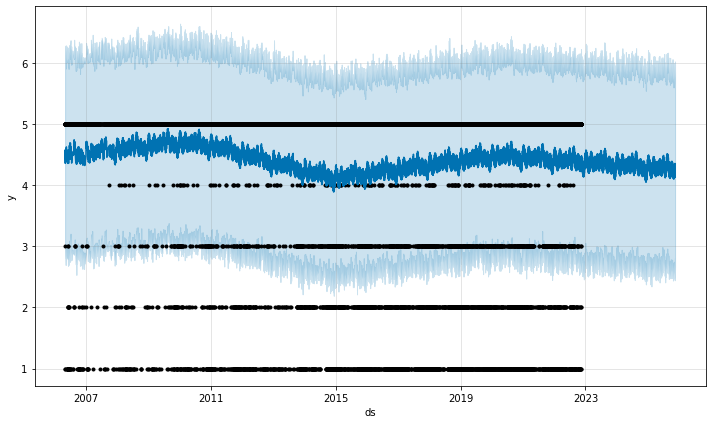

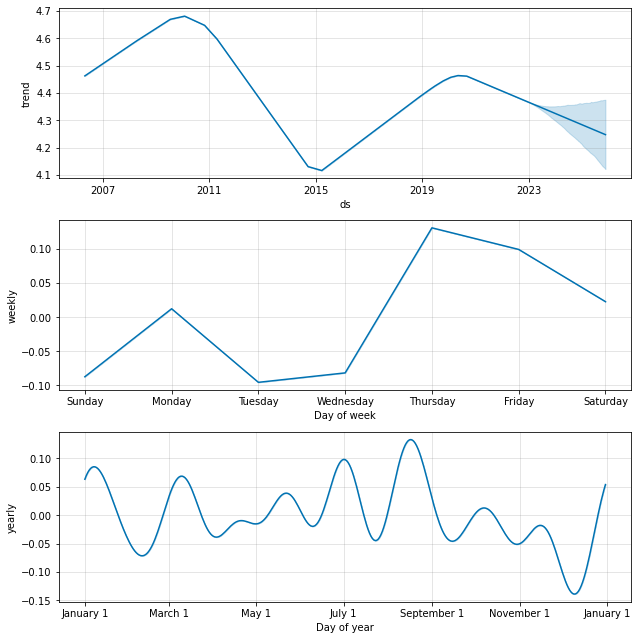

In [ ]:
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
m1 = Prophet()
m1.fit(df_time)
days = int(input('Enter the number of years'))
future = m1.make_future_dataframe(periods = days*365)
forecast = m1.predict(future)

fig1 = m1.plot(forecast)
fig2 = m1.plot_components(forecast)

plt.show()

In [ ]:
df5

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,ingredient_text_1,ingredient_text_2,ingredient_text_3,...,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating,Dish,Flavor_Type
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,lb sweet potatoes,cup butter,cup all-purpose flour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Casserole,Savory
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,large boneless skinless chicken breasts (1 1/4...,cup shredded Swiss cheese (2 oz),cup finely chopped ham (2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,bag (10 oz) frozen white rice (1 1/2 cups cook...,bag (12 oz) frozen whole kernel sweet corn,can (15 oz) Progresso black beans drained ri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,lb lean (at least 80%) ground beef,cup chopped onion,bag (12 oz) frozen mixed vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,Dessert,crust from 1 box (14.1 oz) refrigerated Pillsb...,can (15 oz) pumpkin (no pumpkin pie mix),can (12 oz) evaporated milk (11/2cups),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pie,Sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.00,Dessert,package (16 oz) refrigerated Pillsbury Ready t...,cup chopped pecans,cup water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Bar~Desserts & Treats,Savory
535,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.00,Appetizer,oz cream cheese (from two 8-oz packages) soft...,tablespoons Louisiana hot sauce or other red p...,cup crumbled blue cheese (1 1/2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory~Spicy
536,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.00,Entree~Dinner,box (14.1 oz) refrigerated Pillsbury Pie Crust...,cups diced cooked chicken,cups frozen mixed vegetables thawed (from12 o...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pot Pie~Casserole~Pie,Savory
537,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,package (8 oz) cream cheese softened,cup sour cream,package (1 oz) ranch salad dressing & seasonin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Dip,Savory


In [ ]:
s='2 hr 15 min'
s1='10 min'
import re

result = re.sub('\D', ' ',s)

result=result.split(' ')

print(result)

['2', '', '', '', '15', '', '', '', '']


More the number of calories, worse the reviews seem to be

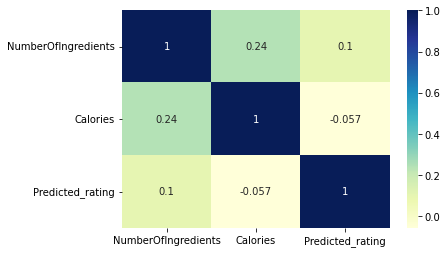

In [ ]:
sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)

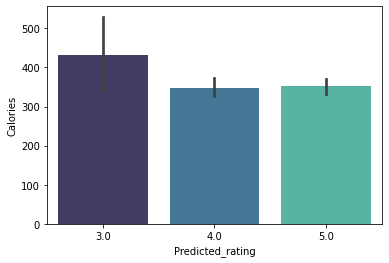

In [ ]:
import seaborn as sns
sns.barplot(y=df5['Calories'],x=df5['Predicted_rating'],palette='mako')

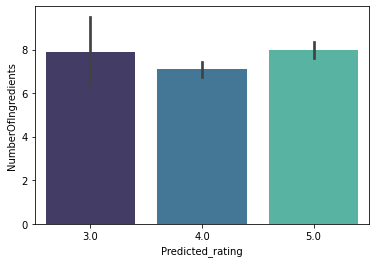

In [ ]:
sns.barplot(y=df5['NumberOfIngredients'],x=df5['Predicted_rating'],palette='mako')

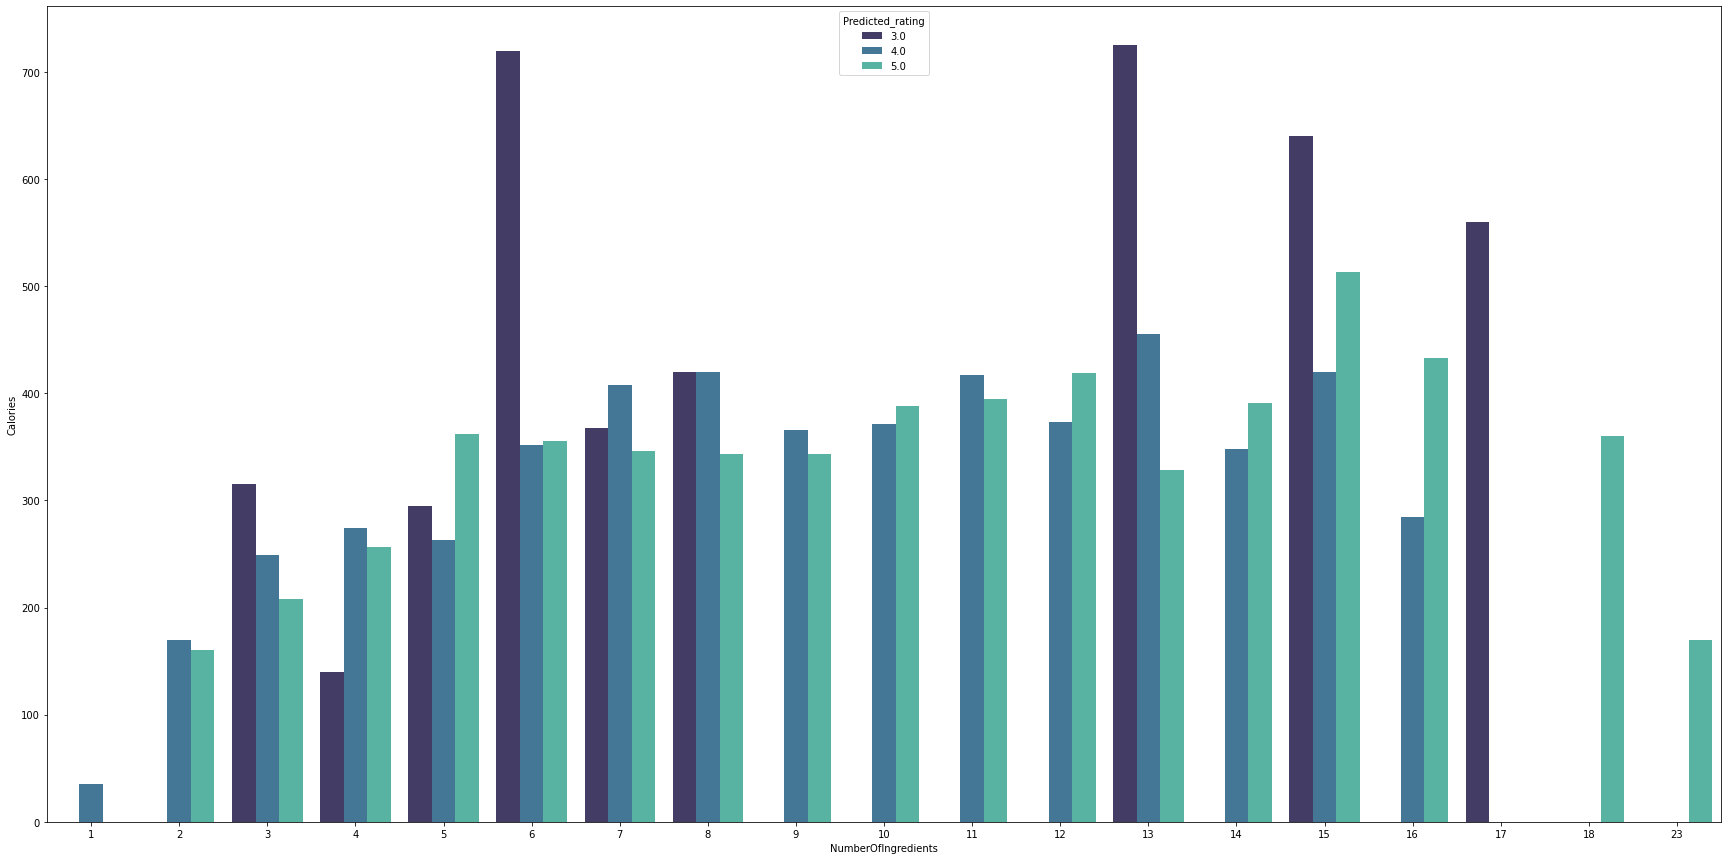

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(x=df5['NumberOfIngredients'],y=df5['Calories'],hue=df5['Predicted_rating'],palette='mako',ci=None)

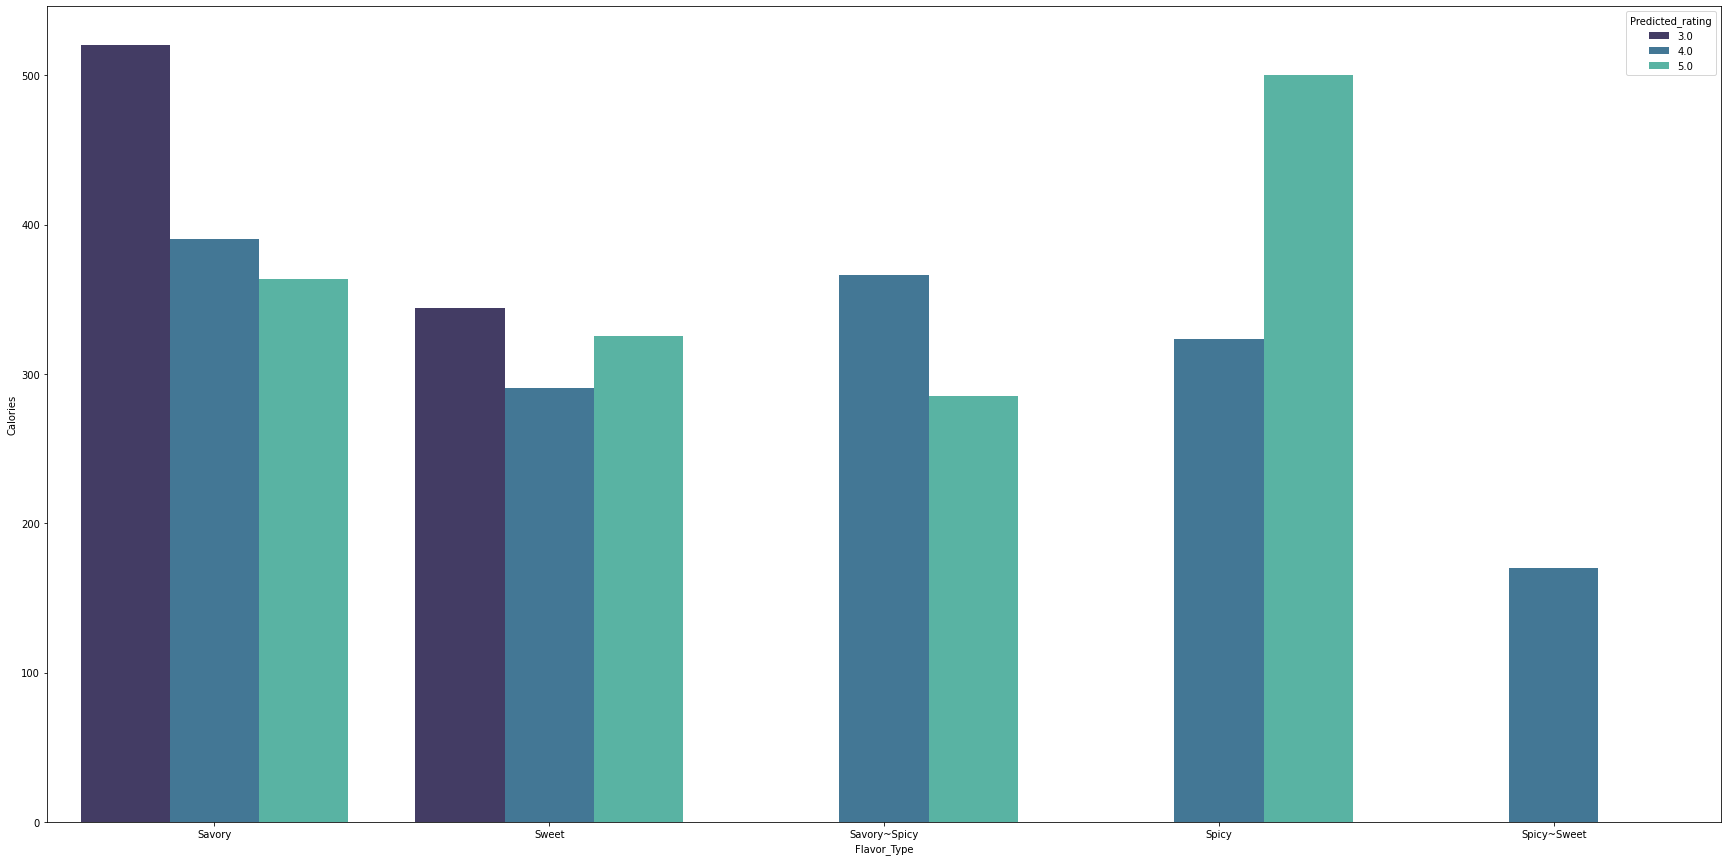

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(x=df5['Flavor_Type'],hue=df5['Predicted_rating'],y=df5['Calories'],palette='mako',ci=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

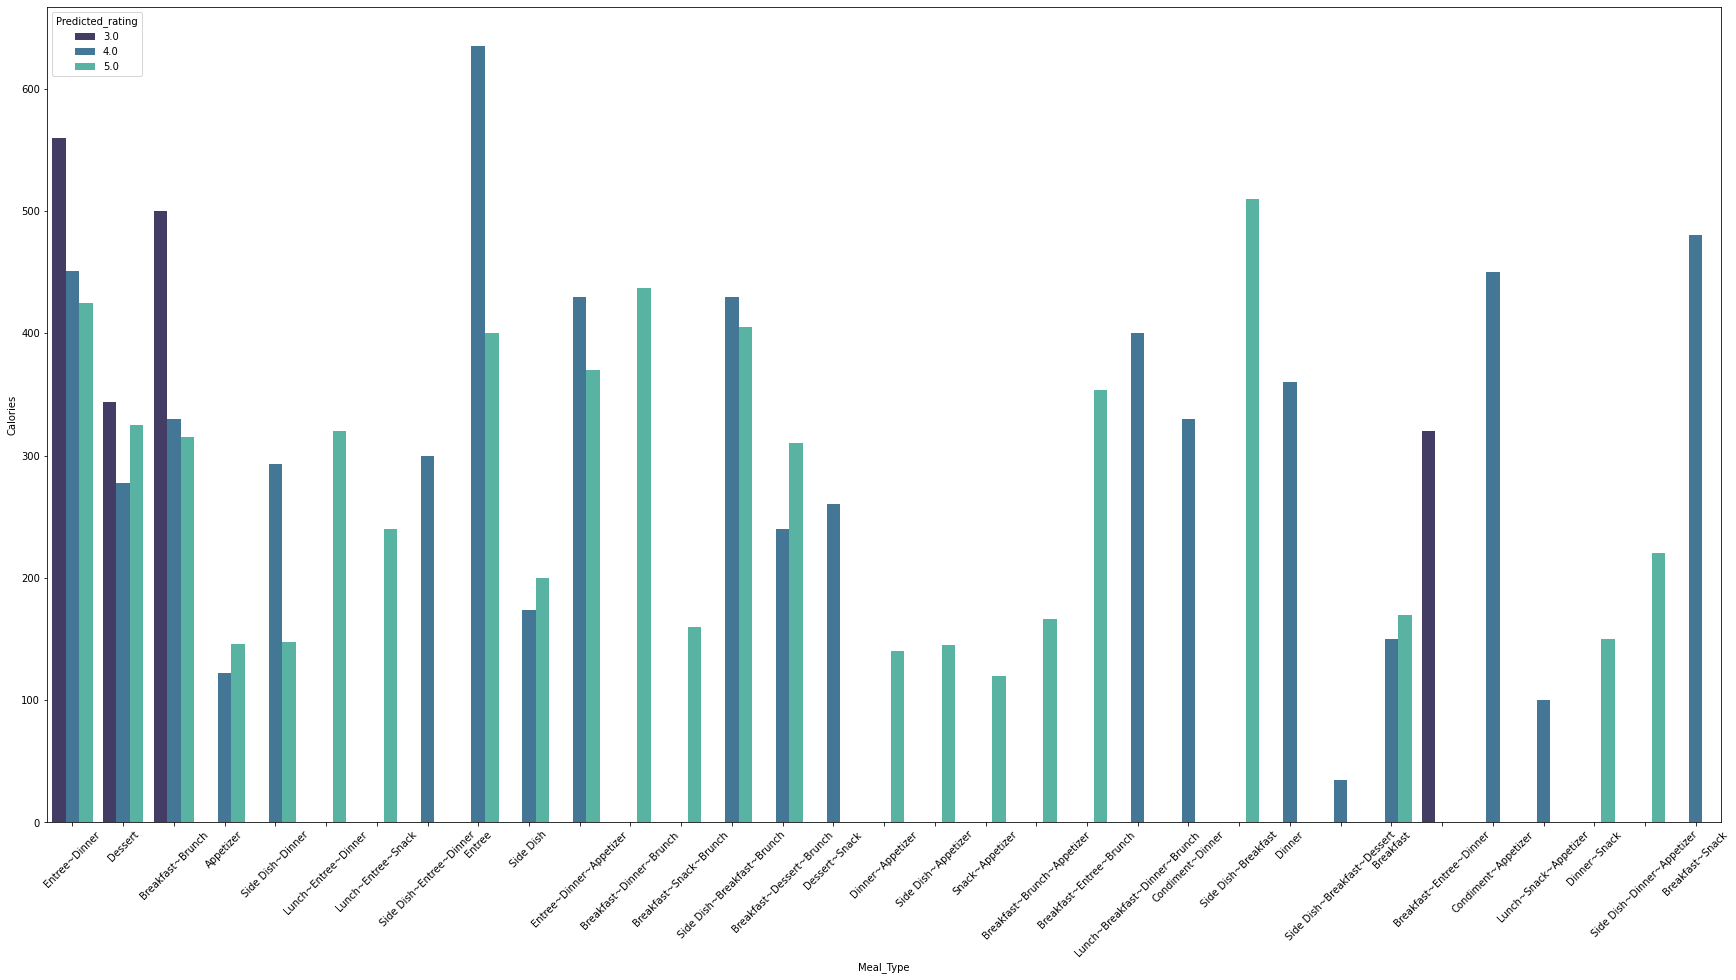

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(x=df5['Meal_Type'],hue=df5['Predicted_rating'],y=df5['Calories'],palette='mako',ci=None)
plt.xticks(rotation=45)

In [ ]:
df6=df5.copy()

label encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df6['Flavor_Type']=le.fit_transform(df6['Flavor_Type'])

In [ ]:
le=LabelEncoder()
df6['Dish']=le.fit_transform(df6['Dish'])

In [ ]:
le=LabelEncoder()
df6['Meal_Type']=le.fit_transform(df6['Meal_Type'])

In [ ]:
df6

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,ingredient_text_1,ingredient_text_2,ingredient_text_3,...,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating,Dish,Flavor_Type
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,18,lb sweet potatoes,cup butter,cup all-purpose flour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,7,0
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,18,large boneless skinless chicken breasts (1 1/4...,cup shredded Swiss cheese (2 oz),cup finely chopped ham (2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,7,0
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,18,bag (10 oz) frozen white rice (1 1/2 cups cook...,bag (12 oz) frozen whole kernel sweet corn,can (15 oz) Progresso black beans drained ri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,7,0
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,18,lb lean (at least 80%) ground beef,cup chopped onion,bag (12 oz) frozen mixed vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,7,0
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,12,crust from 1 box (14.1 oz) refrigerated Pillsb...,can (15 oz) pumpkin (no pumpkin pie mix),can (12 oz) evaporated milk (11/2cups),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,57,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.00,12,package (16 oz) refrigerated Pillsbury Ready t...,cup chopped pecans,cup water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,0,0
535,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.00,0,oz cream cheese (from two 8-oz packages) soft...,tablespoons Louisiana hot sauce or other red p...,cup crumbled blue cheese (1 1/2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,7,1
536,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.00,18,box (14.1 oz) refrigerated Pillsbury Pie Crust...,cups diced cooked chicken,cups frozen mixed vegetables thawed (from12 o...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,65,0
537,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,0,package (8 oz) cream cheese softened,cup sour cream,package (1 oz) ranch salad dressing & seasonin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,31,0


Basic Machine Learning Model based on all attributes but the ingredients

In [ ]:
X=df6.loc[:, ['Flavor_Type','Dish','Calories','Meal_Type','NumberOfIngredients']]
y=df6['Predicted_rating']

In [ ]:
print(X)

     Flavor_Type  Dish  Calories  Meal_Type  NumberOfIngredients
0              0     7    670.00         18                    9
1              0     7    400.00         18                    5
3              0     7    450.00         18                    8
4              0     7    350.00         18                   10
5              4    57    420.00         12                   14
..           ...   ...       ...        ...                  ...
534            0     0    290.00         12                    9
535            1     7    130.00          0                    8
536            0    65    610.00         18                    4
537            0    31    200.00          0                    6
538            0    31    200.00          0                    6

[528 rows x 5 columns]


In [ ]:
print(y)

0     4.00
1     5.00
3     5.00
4     5.00
5     4.00
      ... 
534   4.00
535   5.00
536   4.00
537   4.00
538   4.00
Name: Predicted_rating, Length: 528, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 22.74it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreeClassifier                0.58               0.64    None      0.57   
LabelSpreading                     0.55               0.61    None      0.54   
LGBMClassifier                     0.58               0.61    None      0.58   
LabelPropagation                   0.54               0.61    None      0.54   
RandomForestClassifier             0.54               0.61    None      0.54   
ExtraTreesClassifier               0.53               0.60    None      0.53   
DecisionTreeClassifier             0.48               0.56    None      0.47   
BaggingClassifier                  0.52               0.56    None      0.51   
XGBClassifier                      0.51               0.43    None      0.50   
GaussianNB                         0.55               0.40    None      0.53   
SVC                                0.55 

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5454545454545454

In [ ]:
import pickle
filename = 'prediction.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
df2

,RecipeId,Predicted_rating
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
1,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
2,0007d1ab-a3d2-4f10-b426-8684d17096ca,1
3,0007d1ab-a3d2-4f10-b426-8684d17096ca,1
4,0007d1ab-a3d2-4f10-b426-8684d17096ca,5
...,...,...
22914,ff8c6758-0958-4e4f-a9cd-6edd413904b4,2
22915,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5
22916,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5
22917,ff8c6758-0958-4e4f-a9cd-6edd413904b4,5


In [ ]:
r_unique=df2['RecipeId'].unique()
r_unique

array(['0007d1ab-a3d2-4f10-b426-8684d17096ca',
       '0096d87f-182d-4b0c-a43d-b88c82036a3b',
       '009981eb-e2a2-48d3-a548-c7afca34f2f3',
       '00c780c8-2b75-433b-b104-6f45ef76aebe',
       '00dda8fc-7206-41bf-bc2c-eb211984d84f',
       '01184791-6f93-443a-a90f-0fc653543c49',
       '013826ef-209a-446a-849f-67d364b8bcfd',
       '01944cc2-ab6f-416c-ba7d-19c1ce79b124',
       '0263957b-3305-4956-bd98-96fb2b88464d',
       '02c742c0-05e4-4e87-b742-cf735e3fe47b',
       '02dffaef-8403-4923-9d0c-107514682cf2',
       '0307fb71-8ec8-41ee-874a-223ef0fd2e2d',
       '03255386-30fb-4fb7-bf0b-0c7ddcb798f0',
       '03c4390c-73f1-48e0-af8e-7399f8755922',
       '03e08dec-c4e1-4782-930d-fd53edaa49c5',
       '03fdb18b-1927-4aff-9415-6fea1435d804',
       '0429b068-1d32-45f8-a375-be567e889244',
       '04bc9494-3f65-4743-9b60-2c872fd6f8be',
       '051c5e19-4557-44d0-892b-c5ddb72e4637',
       '05388adb-5df0-4a44-98a8-9a063ab04367',
       '057bca02-d59e-4fbb-8f3e-62ff7c242d45',
       '05e8c

Finding the difference between the maximum and minimum rating for a review

In [ ]:
diff=[]
for i in r_unique:
  l2=[]
  for j in range(len(df2)):
    try:
      if(df2['RecipeId'][j]==i):
        l2.append(df2['Predicted_rating'][j])
    except:
      pass
  difference=max(l2)-min(l2)
  diff.append(difference)

In [ ]:
print(diff)

[4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 3, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 2, 3, 4, 3, 4, 4, 

In [ ]:
for i in range(9):
  diff.append(4)

In [ ]:
df6['diff']=diff

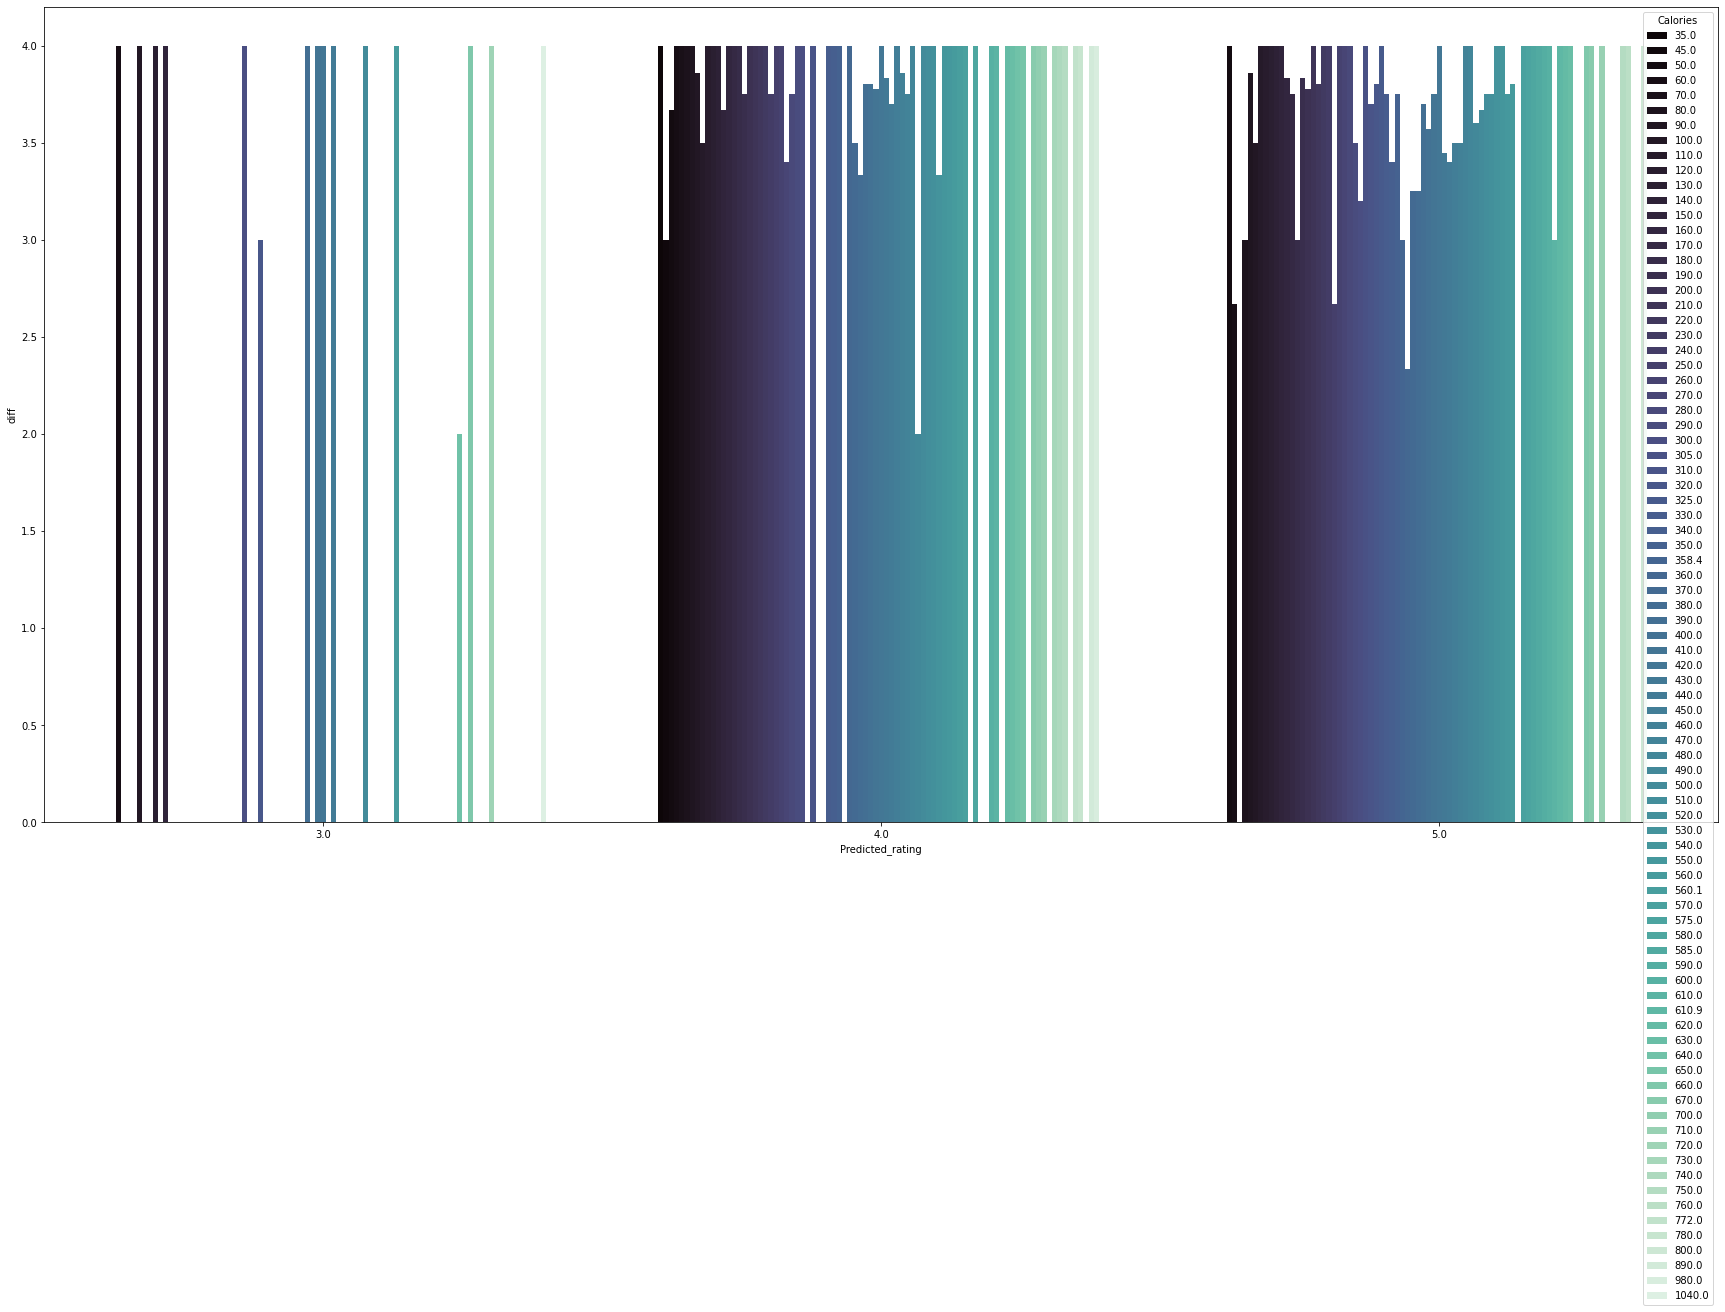

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(hue=df6['Calories'],x=df6['Predicted_rating'],y=df6['diff'],palette='mako',ci=None)

In [ ]:
df5

,RecipeId,RecipeName,Introduction,NumberOfIngredients,TotalTime,Calories,Meal_Type,ingredient_text_1,ingredient_text_2,ingredient_text_3,...,ingredient_text_17,ingredient_text_18,ingredient_text_19,ingredient_text_20,ingredient_text_21,ingredient_text_22,ingredient_text_23,Predicted_rating,Dish,Flavor_Type
0,0007d1ab-a3d2-4f10-b426-8684d17096ca,Cheesy Chicken and Sweet Potato Casserole,This casserole takes comfort food to a whole n...,9,2 hr 30 min,670.00,Entree~Dinner,lb sweet potatoes,cup butter,cup all-purpose flour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Casserole,Savory
1,0096d87f-182d-4b0c-a43d-b88c82036a3b,Stuffed Chicken Breasts Cordon Bleu,Baked chicken cordon bleu has a fancy reputati...,5,45 min,400.00,Entree~Dinner,large boneless skinless chicken breasts (1 1/4...,cup shredded Swiss cheese (2 oz),cup finely chopped ham (2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
3,00c780c8-2b75-433b-b104-6f45ef76aebe,Beef Taquito Casserole,Frozen beef taquitos are the perfect topper fo...,8,50 min,450.00,Entree~Dinner,bag (10 oz) frozen white rice (1 1/2 cups cook...,bag (12 oz) frozen whole kernel sweet corn,can (15 oz) Progresso black beans drained ri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
4,00dda8fc-7206-41bf-bc2c-eb211984d84f,Shepherd's Pie,Wondering how to make Shepherd's Pie? Our vers...,10,60 min,350.00,Entree~Dinner,lb lean (at least 80%) ground beef,cup chopped onion,bag (12 oz) frozen mixed vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory
5,01184791-6f93-443a-a90f-0fc653543c49,Streusel-Topped Pumpkin Pie,A crunchy oat topping complements every bite o...,14,2 hr 5 min,420.00,Dessert,crust from 1 box (14.1 oz) refrigerated Pillsb...,can (15 oz) pumpkin (no pumpkin pie mix),can (12 oz) evaporated milk (11/2cups),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pie,Sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,fe2fabfe-bb08-418a-85bf-3c1cd62aef53,Chocolate Pecan Bars,These bars went overboard on gooeyness topped ...,9,2 hr 15 min,290.00,Dessert,package (16 oz) refrigerated Pillsbury Ready t...,cup chopped pecans,cup water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Bar~Desserts & Treats,Savory
535,fea6458e-42f9-4f1c-ae94-2585012b1011,Buffalo Chicken Crescent Puffs,A spicy chicken and cheese filling mixture is ...,8,1 hr 10 min,130.00,Appetizer,oz cream cheese (from two 8-oz packages) soft...,tablespoons Louisiana hot sauce or other red p...,cup crumbled blue cheese (1 1/2 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Casserole,Savory~Spicy
536,fef45bfb-8380-41ce-b9dc-998249211e7c,Savory Chicken Pot Pie,Pillsbury refrigerated pie crusts make a delic...,4,40 min,610.00,Entree~Dinner,box (14.1 oz) refrigerated Pillsbury Pie Crust...,cups diced cooked chicken,cups frozen mixed vegetables thawed (from12 o...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Pot Pie~Casserole~Pie,Savory
537,ff8c6758-0958-4e4f-a9cd-6edd413904b4,Ranch Crack Dip,Ranch Crack Dip will be your new go-to dish fo...,6,10 min,200.00,Appetizer,package (8 oz) cream cheese softened,cup sour cream,package (1 oz) ranch salad dressing & seasonin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Dip,Savory


In [ ]:
df5.to_csv('vizz.csv')